# Image Processing using skimage

## Displaying Images

In [51]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Display images from skimage

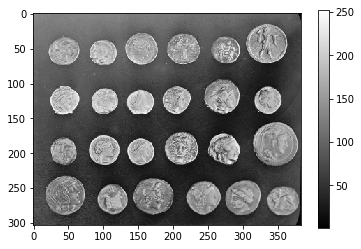

In [53]:
from skimage import data
coins = data.coins()
imgplot = plt.imshow(coins, cmap='gray')
plt.colorbar() # plot a color bar


# cmap can be ['Set1', 'Set2', 'Set3', 'hot', 'nipy_spectral', 'gray']
# see more https://matplotlib.org/examples/color/colormaps_reference.html

### Image Slicing

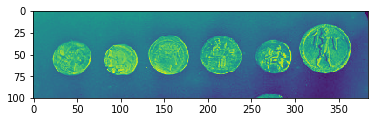

In [26]:
# show only first row of coins
coins2 = coins[:100]
imgplot = plt.imshow(coins2)

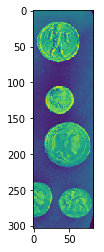

In [27]:
# show only last row of coins
coins2 = coins[:, 300:]
imgplot = plt.imshow(coins2)

### Display external images

https://matplotlib.org/users/image_tutorial.html

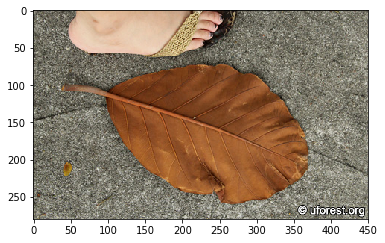

In [43]:
egimage = 'http://uforest.org/images/artocarpus_elasticus2.jpg'
img = imread(egimage) # render image as numpy array
plt.imshow(img)
plt.show()

### Convert color to grayscale
Most image processing algorithms assume a two dimensional matrix, not an image with the third dimension of color. To bring the image into two dimensions, we need to summarize the three colors into a single value.

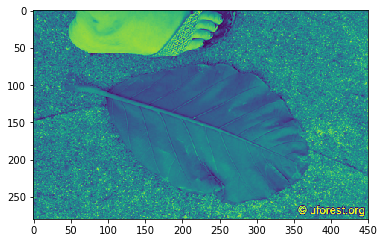

In [60]:
from skimage.color import rgb2gray

img_gray = rgb2gray(img)
plt.imshow(img_gray)
plt.show()

# luminance preservation is observed
# more conversion options http://scikit-image.org/docs/dev/api/skimage.color.html

In [39]:
img_gray.shape

(512, 512)

## Data Descriptions

In [42]:
# data type
print(type(img))

# height x width x rbg (for color images)
print('color:', img.shape)
print('grey scale:', img_gray.shape)

# pixel count
print(img.size)

# data type
print(img.dtype)

<class 'numpy.ndarray'>
color: (512, 512, 3)
grey scale: (512, 512)
786432
uint8


In [13]:
# display values of each grayscaled pixel in a pandas matrix
import pandas as pd
df = pd.DataFrame(coins)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,47,123,133,129,137,132,138,135,134,133,...,104,101,100,90,96,44,7,14,3,12
1,93,144,145,143,145,132,135,133,134,133,...,101,99,97,98,92,75,17,12,7,7
2,126,147,143,147,145,132,136,133,134,132,...,97,95,92,96,87,91,39,2,13,3
3,131,136,133,139,136,130,138,133,133,131,...,93,91,90,89,88,82,68,3,15,7
4,131,133,134,135,129,130,137,128,132,130,...,91,87,89,87,88,77,88,28,8,12


## Image Inversion

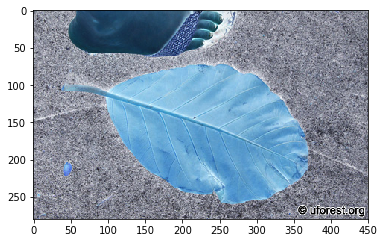

In [71]:
from skimage import util

inverted_img = util.invert(img)
plt.imshow(inverted_img)

## Binary Conversion

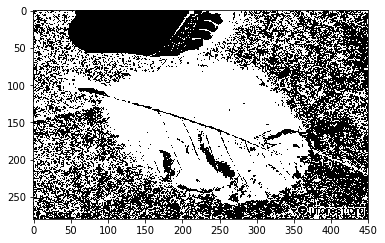

In [77]:
binary_img = np.where(img_gray > np.mean(img_gray),1.0,0.0)
plt.imshow(binary_img, cmap='gray')

## Corner Detection

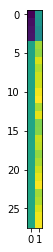

In [56]:
from skimage.feature import corner_harris, corner_peaks

corners = corner_peaks(corner_harris(img_gray),min_distance=2)
plt.imshow(corners)

## Edge Detection

In [7]:
from skimage import data, io, filters

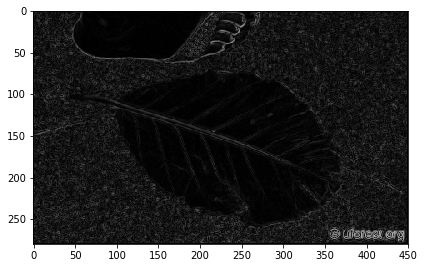

In [70]:
# using Sobel
edges = filters.sobel(img_gray)
io.imshow(edges)
io.show()

## Resources
 * http://blog.yhat.com/posts/image-processing-with-scikit-image.html